### fitting Ks mag, Teff, Fe/H, and parallax

In [1]:
from jaxstar import mistfit
from jax import random
import arviz, corner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mf = mistfit.MistFit()

In [3]:
# observed Kmag, Teff, Fe/H, parallax (mas)
kmag_obs, kmag_err, teff_obs, feh_obs, parallax_obs, parallax_err\
= [ 8.84300000e+00,  1.40000000e-02,  5.71900000e+03, -1.20000000e-01, 7.27355841e+00,  3.00812913e-02]
teff_err, feh_err = 110, 0.1

In [4]:
mf.set_data(['kmag', 'teff', 'feh', 'parallax'],\
            [kmag_obs, teff_obs, feh_obs, parallax_obs],\
            [kmag_err, teff_err, feh_err, parallax_err])

In [7]:
# setup HMC
ns = 10000
mf.setup_hmc(num_warmup=ns, num_samples=ns, target_accept_prob=0.9)

In [9]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=False)

sample: 100%|██████████| 20000/20000 [00:09<00:00, 2130.22it/s, 127 steps of size 4.14e-02. acc. prob=0.95]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      9.06      2.57      9.22      5.57     13.79   1359.38      1.00
  distance      0.14      0.00      0.14      0.14      0.14   4554.63      1.00
       eep    397.36     17.52    401.56    372.75    421.41   1180.31      1.00
  feh_init     -0.04      0.08     -0.04     -0.17      0.09   3480.92      1.00

Number of divergences: 3


In [10]:
mcmc = mf.mcmc
samples = mf.samples

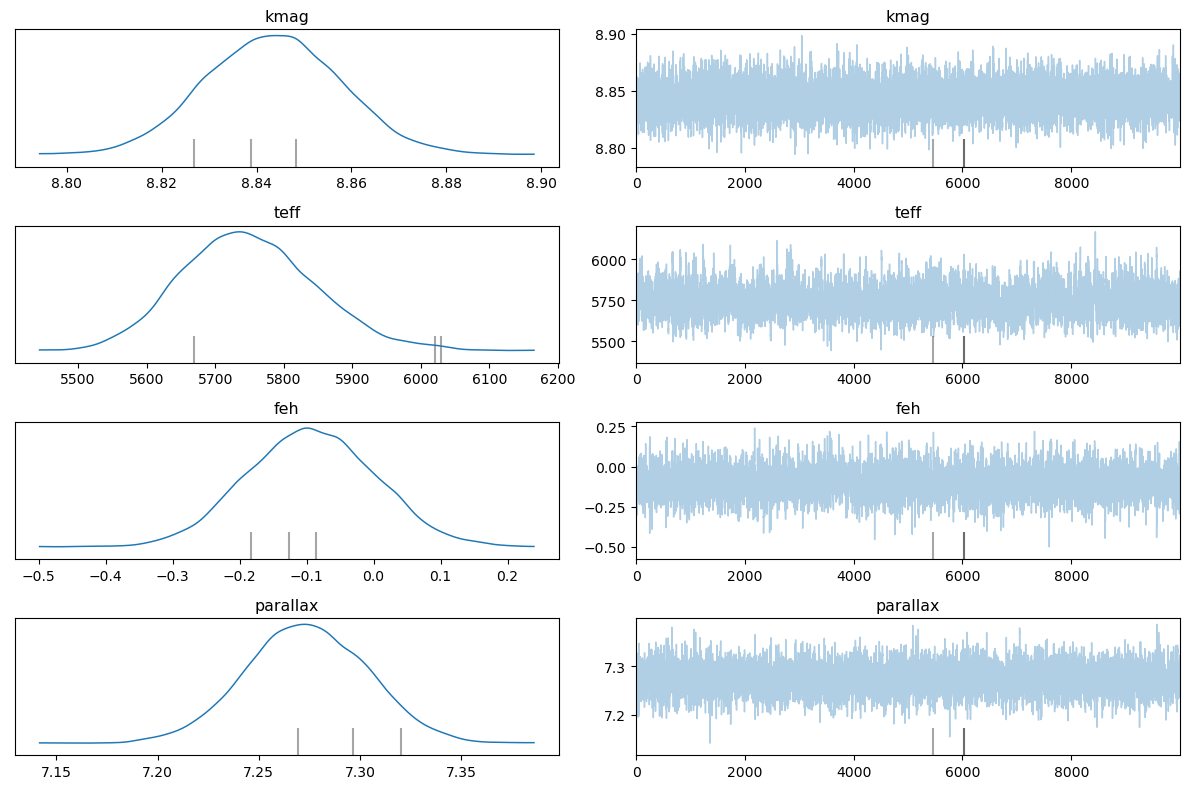

In [11]:
# trace plot
fig = arviz.plot_trace(mcmc, var_names=mf.obskeys)
plt.tight_layout()

In [12]:
# keys and observed values for corner plot
"""note here that 
'feh' is a surface metallicity (relative to solar photospheric value) that is compared to feh_obs
'feh_init' is the initial bulk metallicity (relative to protosolar value)
"""
outkeys = mf.obskeys + ['feh_init', 'mass', 'radius', 'age', 'eep']
obsvals = mf.obsvals + [None] * 5

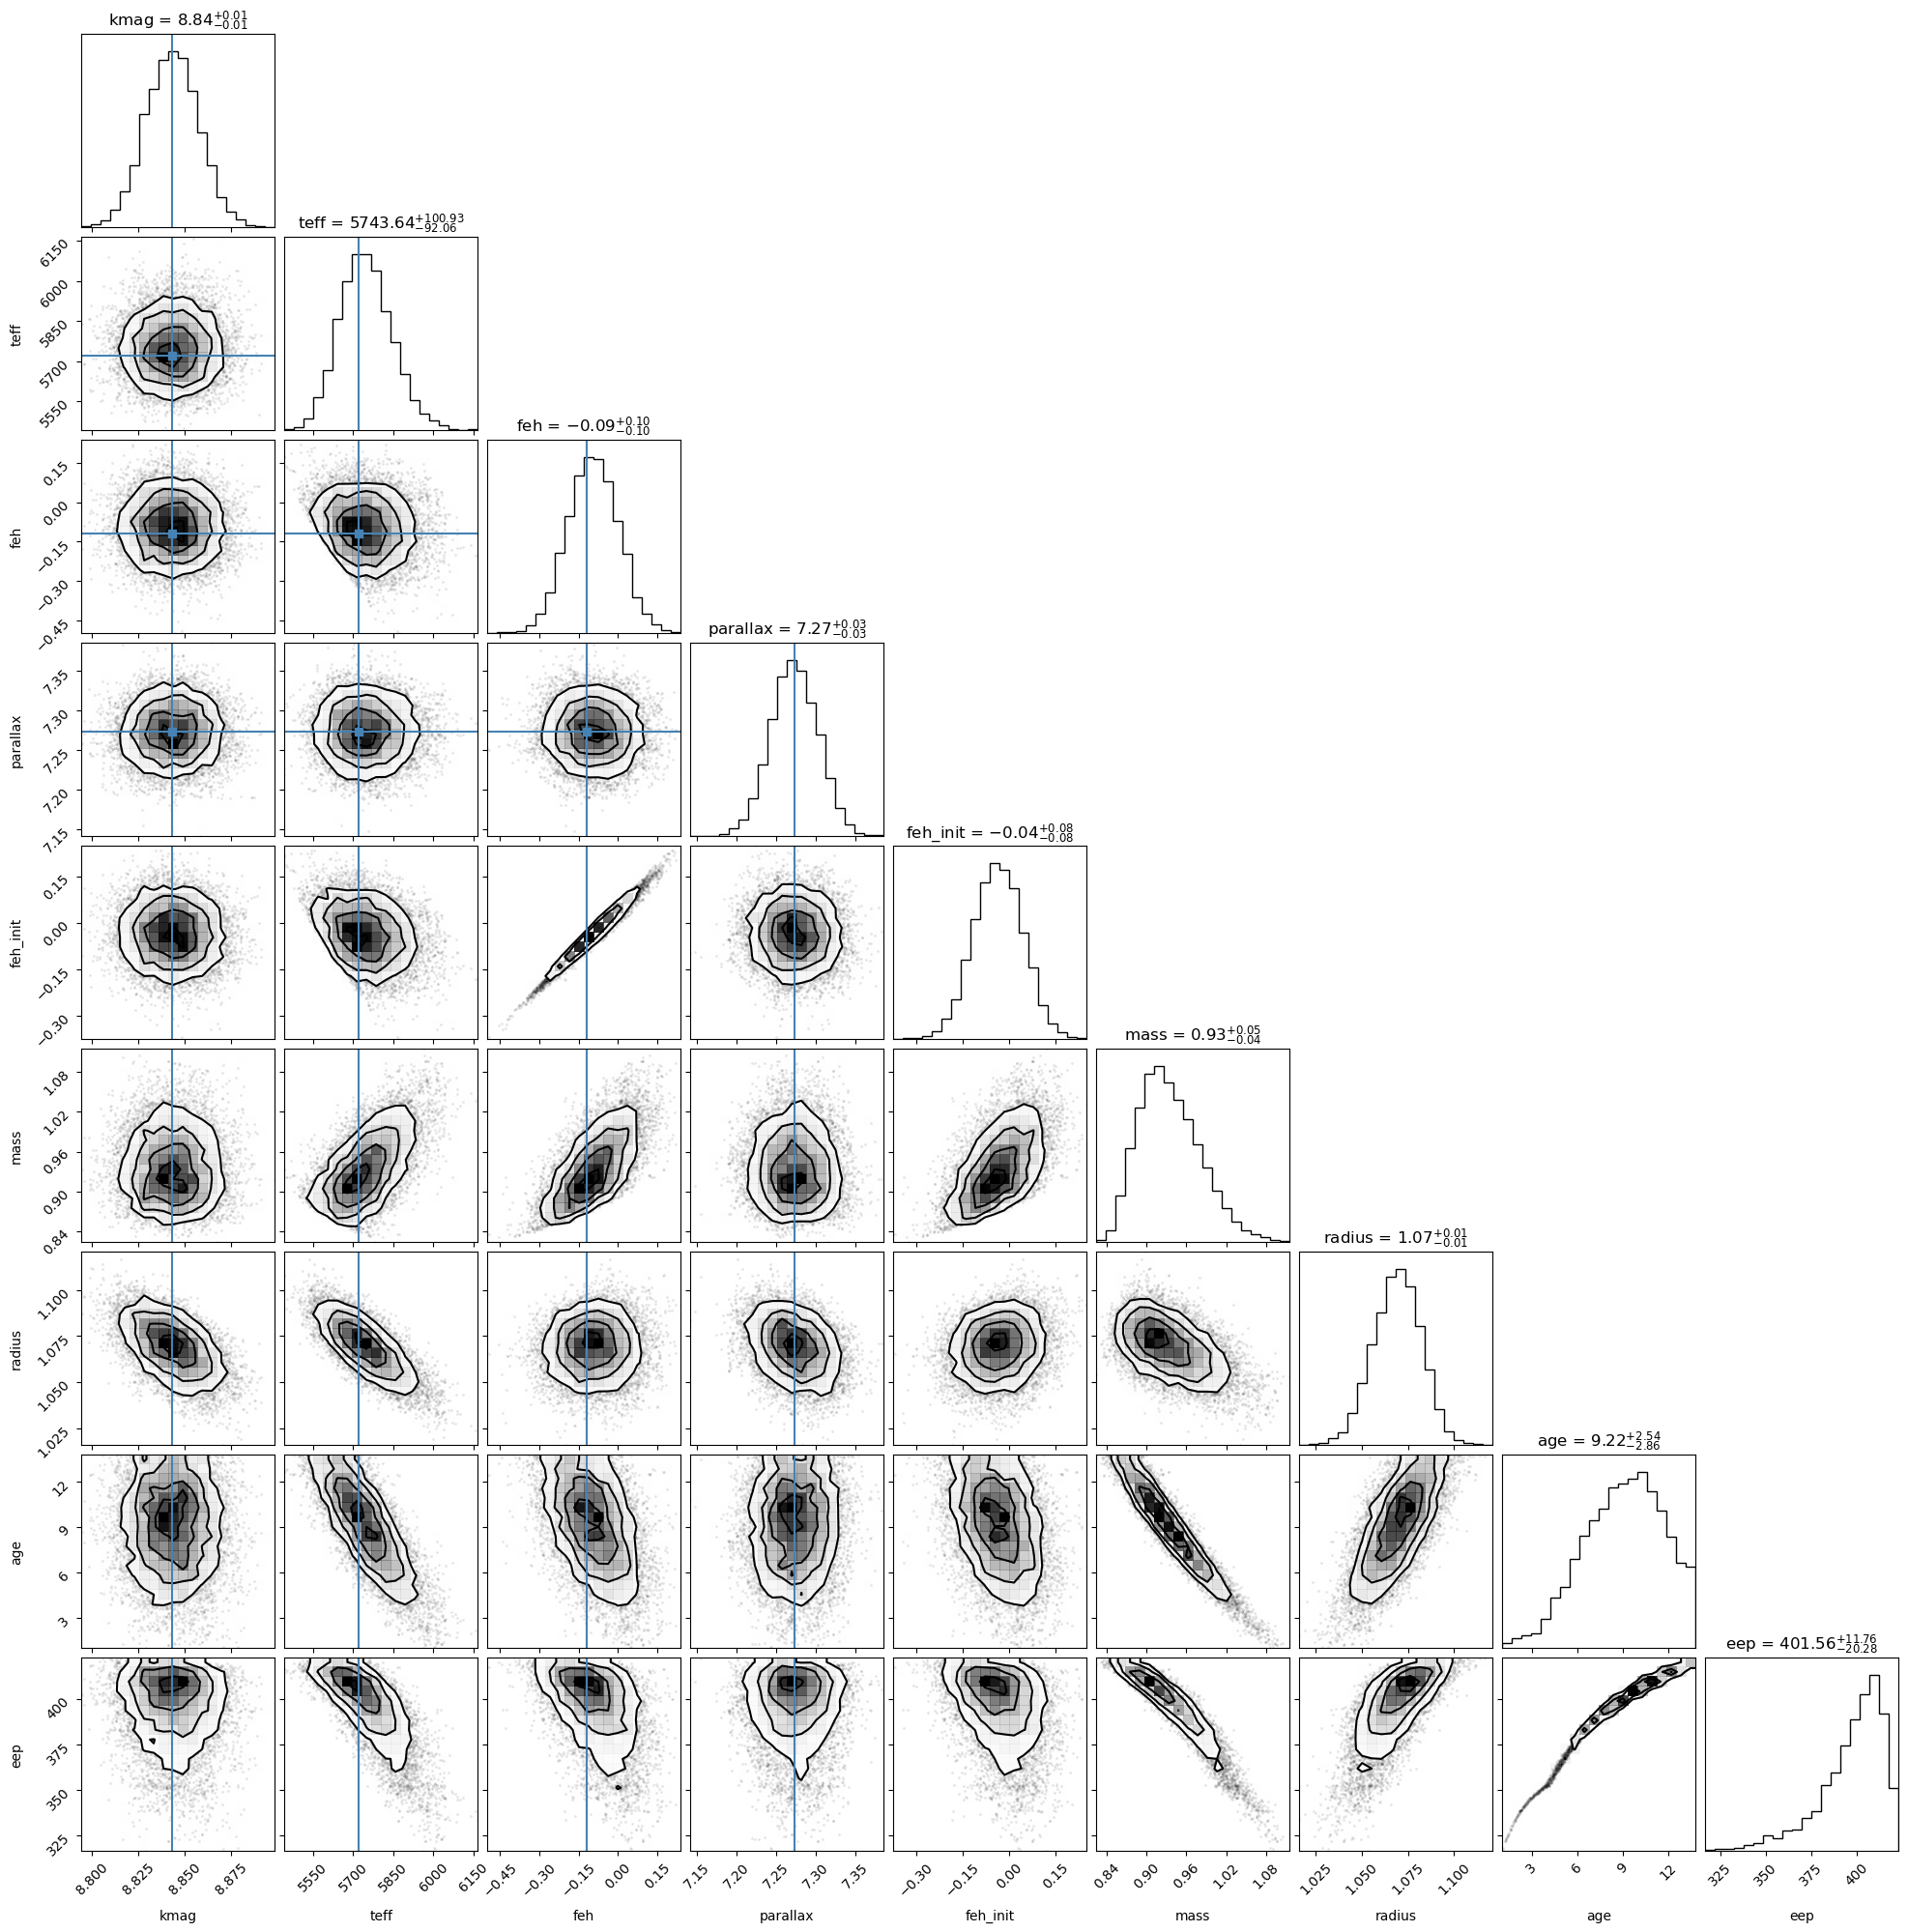

In [13]:
params = np.array(pd.DataFrame(data=dict(zip(outkeys, [samples[k] for k in outkeys]))))
fig = corner.corner(params, show_titles="%.2f", truths=obsvals, labels=outkeys)